In [6]:
import os
import random
import matplotlib.pyplot as plt

from PIL import Image
from pathlib import Path

In [65]:
from torchvision import transforms
from torchvision.io import read_image
from torchvision.transforms import functional as F

In [212]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [28]:
image_directory = Path('data/flowers/')

In [213]:
# Model configs
B = 124

In [193]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p = 0.2),

    transforms.Resize(128),
    transforms.ToTensor(),
    # transforms.Normalize(mean=(0.5, 0.5, 0.5), std =(0.5, 0.5, 0.5))                            
])

In [194]:
class FlowersDataset(Dataset):
    def __init__(self, image_directory: Path, transform=None):
        self.image_directory = image_directory
        self.transform = transform
        self.image_files = list(self.image_directory.glob('*.*'))

    def __getitem__(self, idx):
        image_path = self.image_files[idx]
        image_tensor = read_image(image_path.as_posix())
        image_tensor = image_tensor[:3, :, :]
        if self.transform:
            image_pil = F.to_pil_image(image_tensor)
            image_tensor = self.transform(image_pil)
        return image_tensor, image_path

    def __len__(self):
        return len(self.image_files)

In [195]:
dataset = FlowersDataset(image_directory=image_directory, transform=transform)

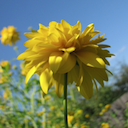

In [210]:
F.to_pil_image(dataset[1][0])

In [214]:
dataloader = DataLoader(dataset, shuffle=True, batch_size=B)

In [217]:
class D(nn.Module):
    def __init__(self):
        ...

    def forward(self, x):
        ...

class G(nn.Module):
    def __init__(self):
        ...

    def forward(self, x):
        ...